In [24]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from glob import glob 

import pandas as pd

from fastcore.xtras import load_pickle

from gptchem.settings import ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

%matplotlib inline

## Load results

In [26]:
all_out = glob("out/**/*.pkl")

In [27]:
all_out = [load_pickle(p) for p in all_out]

In [28]:
extracted_res = []
xgboost_results = []
tabpfn_results = []

for out in all_out: 
    try:
        res = {
            'train_size': out['train_size'],
            'frac_valid': out['frac_valid'],
            'accuracy': out['accuracy'],
            'f1_macro': out['f1_macro'],
            'f1_micro': out['f1_micro'],
            'kappa': out['kappa'],
            "num_classes": out['num_classes'],
            "representation": out['representation']
        }
        extracted_res.append(res)
    except KeyError:
        pass

    xgb_res = {
        'train_size': out['train_size'], 
        'accuracy': out['xgboost_baseline']['accuracy'], 
        'f1_macro': out['xgboost_baseline']['f1_macro'],
        'f1_micro': out['xgboost_baseline']['f1_micro'],
        'kappa': out['xgboost_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

    tabpfn_res = {
        'train_size': out['train_size'], 
        'accuracy': out['tabpfn_baseline']['accuracy'], 
        'f1_macro': out['tabpfn_baseline']['f1_macro'],
        'f1_micro': out['tabpfn_baseline']['f1_micro'],
        'kappa': out['tabpfn_baseline']['kappa'],
        "num_classes": out['num_classes']
    }

   
    xgboost_results.append(xgb_res)
    tabpfn_results.append(tabpfn_res)

In [29]:
res = pd.DataFrame(extracted_res)
xgboost_res = pd.DataFrame(xgboost_results)
tabpfn_res = pd.DataFrame(tabpfn_results)

In [30]:
grouped_res = res.groupby(['num_classes', "representation", 'train_size']).agg(['mean', 'std', 'count'])

In [31]:
grouped_xgboost_res = xgboost_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [32]:
grouped_tabpfn_res = tabpfn_res.groupby(['num_classes', 'train_size']).agg(['mean', 'std'])

In [33]:
grouped_res.loc[2,:]

frac_valid             accuracy                  \
                                mean  std count      mean       std count   
representation train_size                                                   
InChI          10                1.0  0.0     4  0.564000  0.028659     4   
               50                1.0  0.0     4  0.631000  0.022000     4   
               100               1.0  0.0     3  0.656000  0.038158     3   
               200               1.0  0.0     4  0.677000  0.034157     4   
               500               1.0  0.0     4  0.698000  0.022745     4   
SELFIES        10                1.0  0.0     3  0.533333  0.068391     3   
               50                1.0  0.0     4  0.597000  0.048484     4   
               100               1.0  0.0     4  0.624000  0.028284     4   
               200               1.0  0.0     4  0.652000  0.016330     4   
               500               1.0  0.0     4  0.701000  0.045768     4   
SMILES         10                1.0  0.0     4  0.559000  0.053304     4   
               50                1.0  0.0     4  0.630000  0.038297     4   
               100               1.0  0.0     4  0.672000  0.032166     4   
               200               1.0  0.0     4  0.686000  0.017739     4   
               500               1.0  0.0     4  0.716000  0.022627     4   

                           f1_macro                  f1_micro                  \
                               mean       std count      mean       std count   
representation train_size                                                       
InChI          10          0.529062  0.055677     4  0.564000  0.028659     4   
               50          0.629145  0.022774     4  0.631000  0.022000     4   
               100         0.653247  0.038608     3  0.656000  0.038158     3   
               200         0.676004  0.034927     4  0.677000  0.034157     4   
               500         0.697303  0.023047     4  0.698000  0.022745     4   
SELFIES        10          0.529356  0.061619     3  0.533333  0.068391     3   
               50          0.595268  0.049342     4  0.597000  0.048484     4   
               100         0.621153  0.028165     4  0.624000  0.028284     4   
               200         0.648752  0.016354     4  0.652000  0.016330     4   
               500         0.700891  0.045780     4  0.701000  0.045768     4   
SMILES         10          0.502316  0.111393     4  0.559000  0.053304     4   
               50          0.629163  0.038806     4  0.630000  0.038297     4   
               100         0.666842  0.036934     4  0.672000  0.032166     4   
               200         0.683823  0.017312     4  0.686000  0.017739     4   
               500         0.715869  0.022623     4  0.716000  0.022627     4   

                              kappa                  
                               mean       std count  
representation train_size                            
InChI          10          0.128000  0.057318     4  
               50          0.262000  0.044000     4  
               100         0.312000  0.076315     3  
               200         0.354000  0.068313     4  
               500         0.396000  0.045490     4  
SELFIES        10          0.066667  0.136782     3  
               50          0.194000  0.096967     4  
               100         0.248000  0.056569     4  
               200         0.304000  0.032660     4  
               500         0.402000  0.091535     4  
SMILES         10          0.118000  0.106608     4  
               50          0.260000  0.076594     4  
               100         0.344000  0.064332     4  
               200         0.372000  0.035478     4  
               500         0.432000  0.045255     4

In [34]:
grouped_tabpfn_res

accuracy            f1_macro            f1_micro  \
                            mean       std      mean       std      mean   
num_classes train_size                                                     
2           10          0.568571  0.024651  0.566247  0.026276  0.568571   
            50          0.576800  0.014199  0.574968  0.014778  0.576800   
            100         0.586857  0.018459  0.586033  0.018520  0.586857   
            200         0.619200  0.023626  0.618907  0.023593  0.619200   
            500         0.619429  0.051005  0.617974  0.052165  0.619429   
5           10          0.207000  0.031177  0.192422  0.036795  0.207000   
            50          0.238000  0.028718  0.230390  0.025027  0.238000   
            100         0.244000  0.025923  0.223232  0.030321  0.244000   
            200         0.284000  0.031680  0.259089  0.036695  0.284000   
            500         0.350000  0.021809  0.318189  0.013289  0.350000   

                                     kappa            
                             std      mean       std  
num_classes train_size                                
2           10          0.024651  0.137143  0.049301  
            50          0.014199  0.153600  0.028397  
            100         0.018459  0.173714  0.036919  
            200         0.023626  0.238400  0.047251  
            500         0.051005  0.238857  0.102010  
5           10          0.031177  0.008750  0.038971  
            50          0.028718  0.047500  0.035898  
            100         0.025923  0.055000  0.032404  
            200         0.031680  0.105000  0.039600  
            500         0.021809  0.187500  0.027261

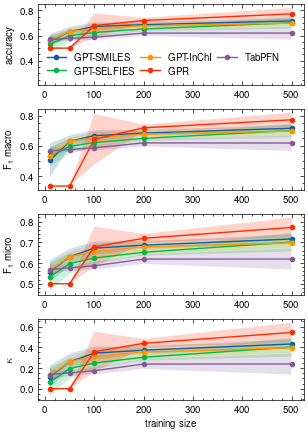

In [35]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[2, 'SMILES', :].index,
        grouped_res.loc[2, 'SMILES', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'SMILES', :].index,
        grouped_res.loc[2, 'SMILES', :][metric]['mean'] - grouped_res.loc[2, 'SMILES', :][metric]['std'],
        grouped_res.loc[2, 'SMILES', :][metric]['mean'] + grouped_res.loc[2, 'SMILES', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[2, 'SELFIES', :].index,
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'SELFIES', :].index,
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'] - grouped_res.loc[2, 'SELFIES', :][metric]['std'],
        grouped_res.loc[2, 'SELFIES', :][metric]['mean'] + grouped_res.loc[2, 'SELFIES', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[2, 'InChI', :].index,
        grouped_res.loc[2, 'InChI', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[2, 'InChI', :].index,
        grouped_res.loc[2, 'InChI', :][metric]['mean'] - grouped_res.loc[2, 'InChI', :][metric]['std'],
        grouped_res.loc[2, 'InChI', :][metric]['mean'] + grouped_res.loc[2, 'InChI', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[2,:].index,
        grouped_xgboost_res.loc[2,:][metric]['mean'] - grouped_xgboost_res.loc[2,:][metric]['std'],
        grouped_xgboost_res.loc[2,:][metric]['mean'] + grouped_xgboost_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[2,:].index,
        grouped_tabpfn_res.loc[2,:][metric]['mean'] - grouped_tabpfn_res.loc[2,:][metric]['std'],
        grouped_tabpfn_res.loc[2,:][metric]['mean'] + grouped_tabpfn_res.loc[2,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=3,columnspacing=.5)
ax[0].set_ylim(0.21,0.85)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('bandgap-classification_results_2_class.pdf', bbox_inches='tight')

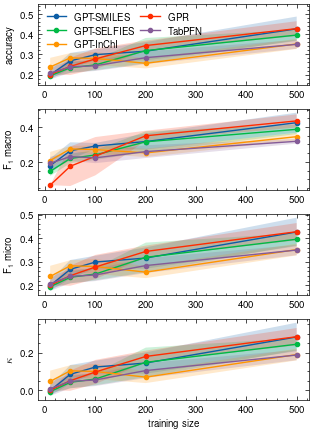

In [36]:
fig, ax = plt.subplots(4, 1, figsize=(ONE_COL_WIDTH_INCH, TWO_COL_GOLDEN_RATIO_HEIGHT_INCH))

# plot the binary case, i.e. num_classes = 2

for i, metric in enumerate(['accuracy', 'f1_macro', 'f1_micro', 'kappa']):
    ax[i].plot(
        grouped_res.loc[5, 'SMILES', :].index,
        grouped_res.loc[5, 'SMILES', :][metric]['mean'],
        marker='o',
        label='GPT-SMILES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'SMILES', :].index,
        grouped_res.loc[5, 'SMILES', :][metric]['mean'] - grouped_res.loc[5, 'SMILES', :][metric]['std'],
        grouped_res.loc[5, 'SMILES', :][metric]['mean'] + grouped_res.loc[5, 'SMILES', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_res.loc[5, 'SELFIES', :].index,
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'],
        marker='o',
        label='GPT-SELFIES',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'SELFIES', :].index,
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'] - grouped_res.loc[5, 'SELFIES', :][metric]['std'],
        grouped_res.loc[5, 'SELFIES', :][metric]['mean'] + grouped_res.loc[5, 'SELFIES', :][metric]['std'],
        alpha=0.2,
    )


    ax[i].plot(
        grouped_res.loc[5, 'InChI', :].index,
        grouped_res.loc[5, 'InChI', :][metric]['mean'],
        marker='o',
        label='GPT-InChI',
    )
    ax[i].fill_between(
        grouped_res.loc[5, 'InChI', :].index,
        grouped_res.loc[5, 'InChI', :][metric]['mean'] - grouped_res.loc[5, 'InChI', :][metric]['std'],
        grouped_res.loc[5, 'InChI', :][metric]['mean'] + grouped_res.loc[5, 'InChI', :][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'],
        marker='o',
        label='GPR'
    )
    ax[i].fill_between(
        grouped_xgboost_res.loc[5,:].index,
        grouped_xgboost_res.loc[5,:][metric]['mean'] - grouped_xgboost_res.loc[5,:][metric]['std'],
        grouped_xgboost_res.loc[5,:][metric]['mean'] + grouped_xgboost_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

    ax[i].plot(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'],
        marker='o',
        label='TabPFN'
    )
    ax[i].fill_between(
        grouped_tabpfn_res.loc[5,:].index,
        grouped_tabpfn_res.loc[5,:][metric]['mean'] - grouped_tabpfn_res.loc[5,:][metric]['std'],
        grouped_tabpfn_res.loc[5,:][metric]['mean'] + grouped_tabpfn_res.loc[5,:][metric]['std'],
        alpha=0.2,
    )

ax[-1].set_xlabel('training size')
ax[0].legend(ncols=2,columnspacing=.5)
ax[0].set_ylim(0.15,0.55)
ax[0].set_ylabel('accuracy')
ax[1].set_ylabel(r'F$_{1}$ macro')
ax[2].set_ylabel(r'F$_{1}$ micro')
ax[3].set_ylabel(r'$\kappa$')

fig.tight_layout()
fig.savefig('bandgap-classification_results_5_class.pdf', bbox_inches='tight')